**Table of contents**<a id='toc0_'></a>    
- [Introduction and Dataset](#toc1_)    
- [Importing Libraries](#toc2_)    
- [Data Cleaning](#toc3_)    
    - [Checking duplicates and null values](#toc3_1_1_)    
      - [Duplicate Values](#toc3_1_1_1_)    
      - [Null Values](#toc3_1_1_2_)    
        - [Recipe Category](#toc3_1_1_2_1_)    
- [EDA](#toc4_)    
    - [Recipe Category](#toc4_1_1_)    
    - [Nutritional content](#toc4_1_2_)    
        - [Corelation Analysis](#toc4_1_2_1_1_)    
        - [Distribution of recipes by the nutrient content](#toc4_1_2_1_2_)    
    - [Ingredients](#toc4_1_3_)    
        - [Most Common & Least Common Ingredients](#toc4_1_3_1_1_)    
        - [Length of ingredients](#toc4_1_3_1_2_)    
    - [Title column](#toc4_1_4_)    
        - [Most common and least common title words](#toc4_1_4_1_1_)    
        - [Length of titles](#toc4_1_4_1_2_)    
    - [Review rating](#toc4_1_5_)    
- [Preprocessing](#toc5_)    
    - [Ingredients](#toc5_1_1_)    
    - [Keywords](#toc5_1_2_)    
    - [RecipeInstructions](#toc5_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction and Dataset](#toc0_)

Dataset for this project was obtained from kaggle.com which has over 500k recipes extracted from food.com. This datset is comprehensive which contains information such as recipe ingredienst, category, keywords, instructions, nutrient contens, time ete. I will use the same to provide recommendations to any user who wants to search a customised soltuon to match their ingredients or keywords that they wish to have in the recipe. 

I will first analyse the dataset, do the required cleaning, perform the EDA and preprocess the data to supoort the modeling. 

# <a id='toc2_'></a>[Importing Libraries](#toc0_)


In [1]:
#importing the basic libraries
import numpy as np
import pandas as pd

#visualisation libraries
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
#importing the word processing libraries


 #importing the regex library
import re

#importing the nltk library
import nltk


#lemmatizer
from nltk.stem import WordNetLemmatizer

#  nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

#defining the stop words
ENGLISH_STOP_WORDS = stopwords.words('english')

import spacy

#library to handle punctuation
import string

#counter library
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e312995\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#speech tagging library
from nltk import pos_tag

#library for word embedding
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# <a id='toc3_'></a>[Data Cleaning](#toc0_)

In [4]:
#reading data
recipes = pd.read_csv('C:/Users/e312995/OneDrive - WESCO DISTRIBUTION/Documents/PERSONAL/BRAINSTATION/CAPSTONE/Datasets/recipes.csv')

In [5]:
#checking the shape of data
recipes.shape

(522517, 28)

In [6]:
#checking a sample of data
recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [7]:
recipes.tail()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,character(0),...,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...","""https://img.sndimg.com/food/image/upload/w_55...",...,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,character(0),...,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN,"c(""heat half and half and heavy cream to a sim..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."
522516,541383,Spicy Baked Scotch Eggs,188099,Chef LauraMD,PT25M,PT15M,PT40M,2020-12-22T22:12:00Z,"Great way to have hard boiled eggs and crispy,...",character(0),...,22.2,1769.7,1318.6,29.7,1.3,6.7,76.4,NaN,NaN,"c(""Mix sausage, panko, egg yolk and Wocestersh..."


In [8]:
#column names
recipes.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

In [9]:
#getting data stats
recipes.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


It can be seen that data entails the recipe name, author details, preparation times, images, recipe category, ingredients, preparation steps, review counts, and differemt nutritional data such as calories, fat etc. This dataset is very comprehensive and along with the recipe, I can give some more information on the recipe so that the user can pick their favorite. 

In [10]:
#getting column info
print(recipes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

### <a id='toc3_1_1_'></a>[Checking duplicates and null values](#toc0_)

#### <a id='toc3_1_1_1_'></a>[Duplicate Values](#toc0_)

In [11]:
recipes.duplicated().sum()

0

There are no records with the duplicates considering all columns. Therefore it is good to proceed. 

#### <a id='toc3_1_1_2_'></a>[Null Values](#toc0_)

In [12]:
recipes.isna().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

It can be seen that columns such as ratings, servings, yield have higher null values. However these data are user entered attributes, therefore it is not possible to do any assumptions to update them. Hence I will not remove thse null rows here.

##### <a id='toc3_1_1_2_1_'></a>[Recipe Category](#toc0_)

My analysis will be on the text data mostly. Out of this recipe category has 751 null values which is almost a 0% from the total dataset, hence it is safe to drop these rows. 

In [13]:
recipes.dropna(subset=['RecipeCategory'], inplace=True)

In [14]:
recipes.shape

(521766, 28)

# <a id='toc4_'></a>[EDA](#toc0_)

In [15]:
recipes.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

### <a id='toc4_1_1_'></a>[Recipe Category](#toc0_)

I will now analyse to see what are the most common recipe categories in the dataset.

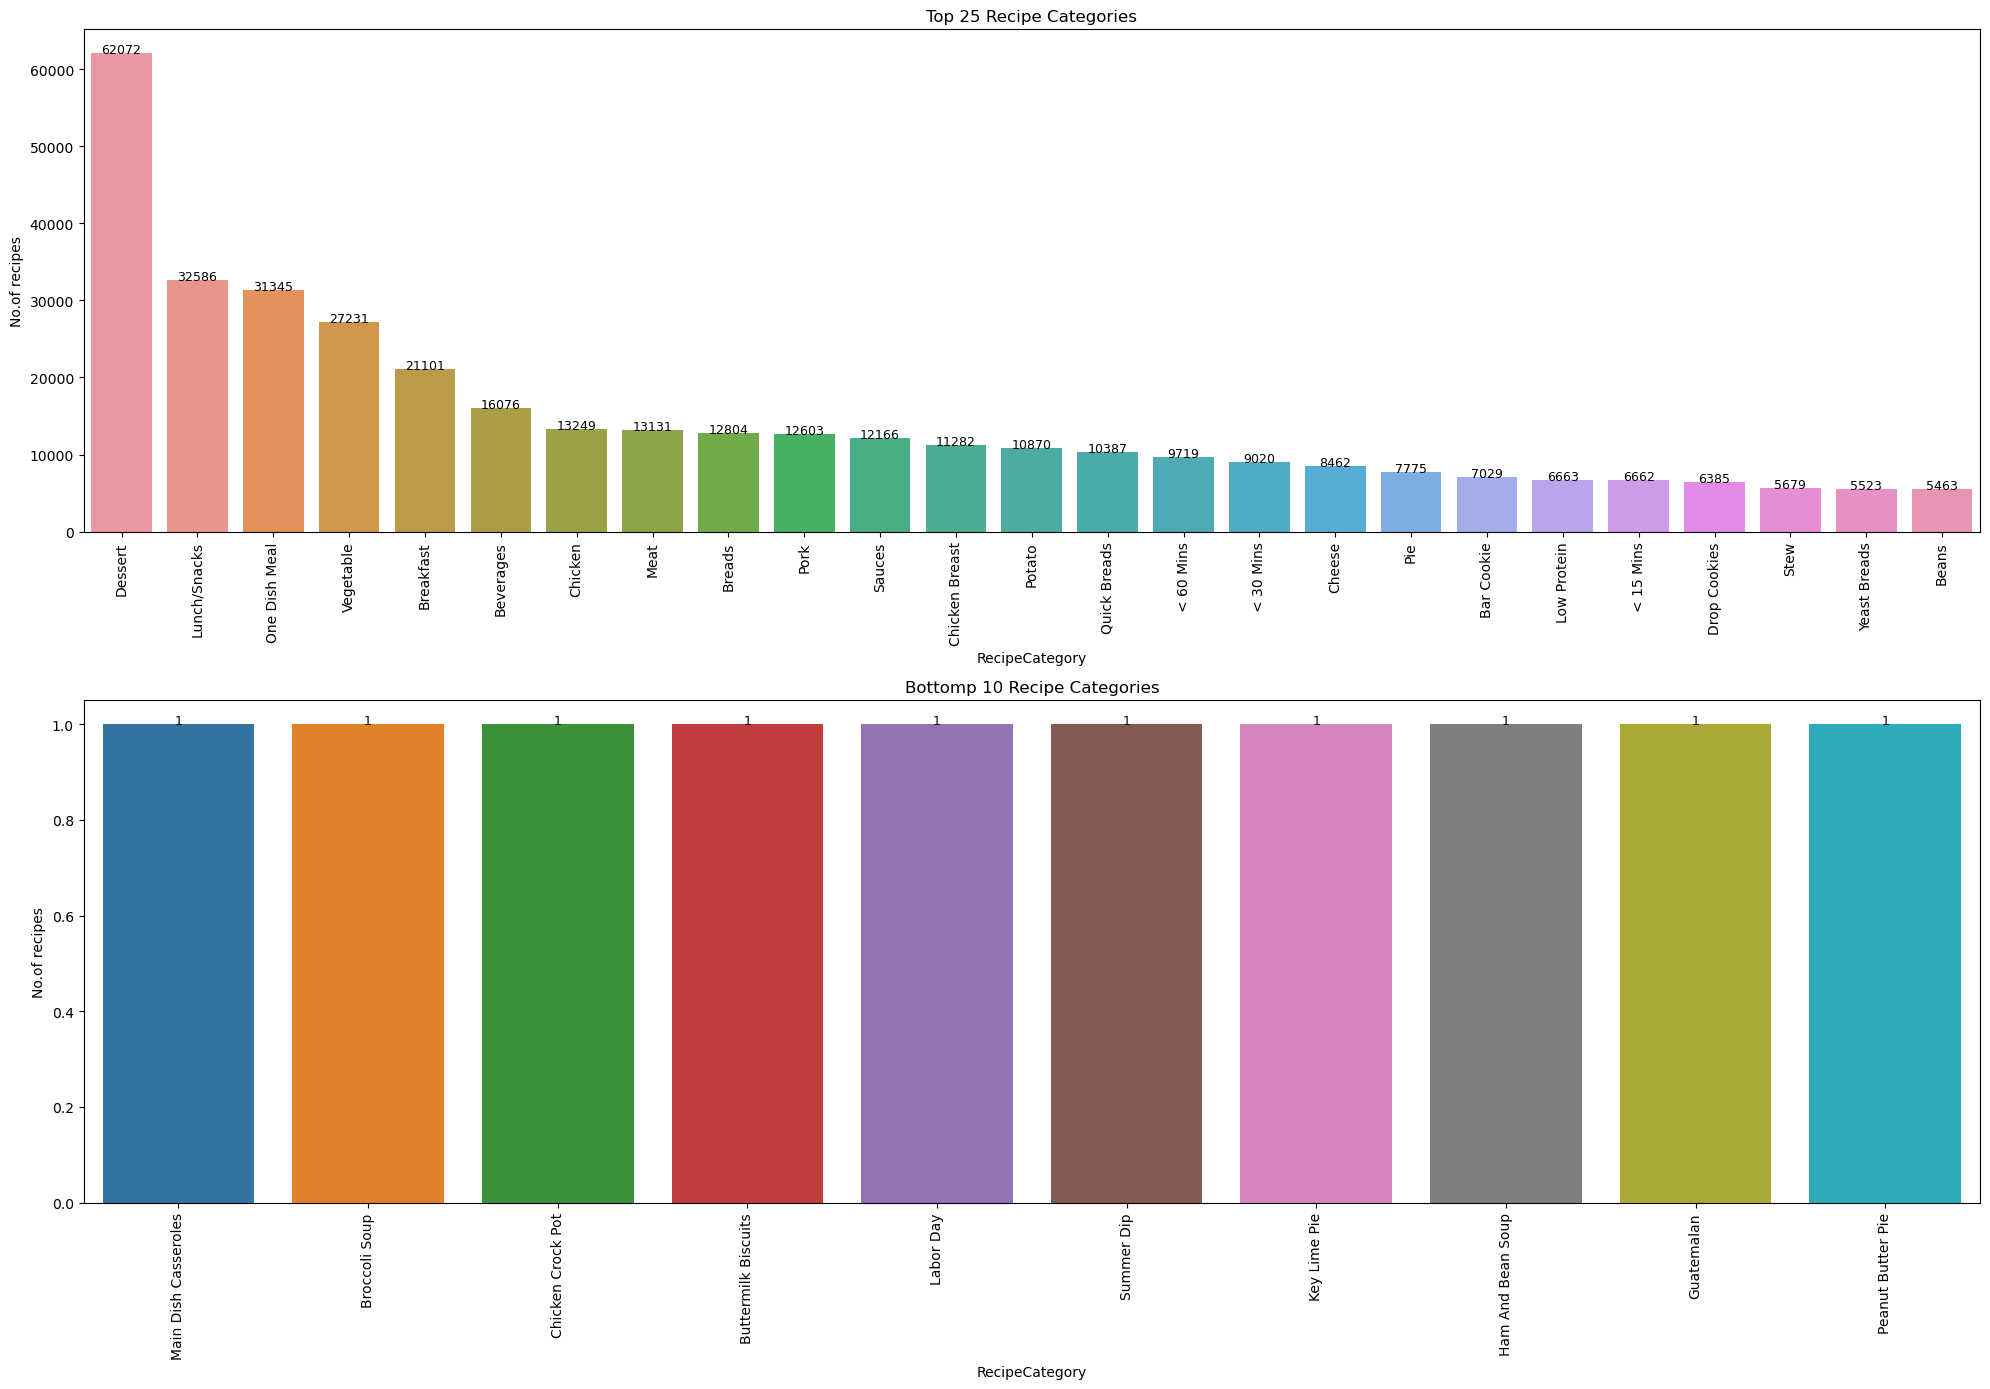

In [16]:
#creating a dataframe with the count of recipes, amd sorting to get the top 25
category_df= recipes.groupby('RecipeCategory').count()['RecipeId'].reset_index()
top_categories= category_df.sort_values(by='RecipeId', ascending= False).head(25)
bottom_categories= category_df.sort_values(by='RecipeId', ascending= False).tail(10)


#graph visualisation

plt.subplots(2,1, figsize=(20,14))

#top recipes
plt.subplot(2,1,1)

ax= sns.barplot(data=top_categories, x='RecipeCategory', y= 'RecipeId') #barplot axis
plt.xticks(rotation=90)

for bar in ax.patches: #labels 
    data_values= "{:.0f}".format(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2,  #label positions
            bar.get_y() + bar.get_height(),
            s=f'{data_values}',  #displaying the dynamic labels
            ha='center', #position
            color='black', #color
            size=9) #size
plt.ylabel('No.of recipes') #ylabel
plt.title('Top 25 Recipe Categories') #title 

#bottom recipes
plt.subplot(2,1,2)

ax= sns.barplot(data=bottom_categories, x='RecipeCategory', y= 'RecipeId') #barplot axis
plt.xticks(rotation=90)

for bar in ax.patches: #labels 
    data_values= "{:.0f}".format(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2,  #label positions
            bar.get_y() + bar.get_height(),
            s=f'{data_values}',  #displaying the dynamic labels
            ha='center', #position
            color='black', #color
            size=9) #size
plt.ylabel('No.of recipes') #ylabel
plt.title('Bottomp 10 Recipe Categories') #title 

plt.tight_layout()
plt.show()

10% of the recipes are pertaining to dessert category but we have many other categories identified as well. On the other hand the least common recipe categories are in fact recipe names itself. Hence maybe why they are not captured in the main categories. 

### <a id='toc4_1_2_'></a>[Nutritional content](#toc0_)

Next I will analyse the columns containing the nutriental data to understand the corelation between them, the distribution of recipes. 

In [17]:
recipes.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

##### <a id='toc4_1_2_1_1_'></a>[Corelation Analysis](#toc0_)

<Axes: >

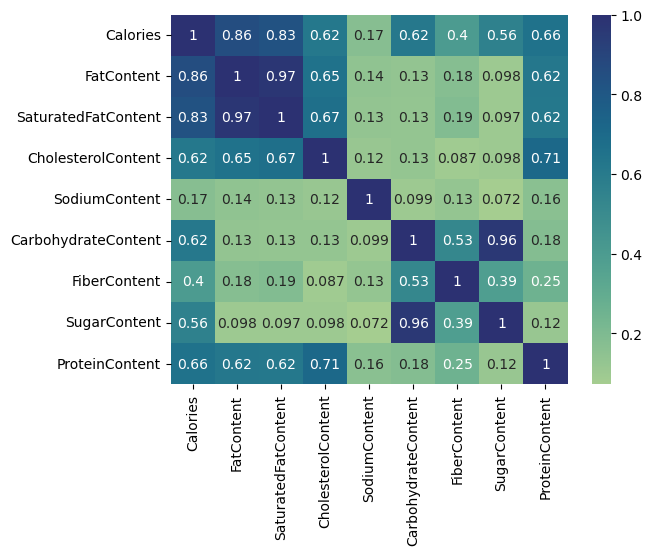

In [65]:
#columns
nutrients_columns= recipes[['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent','SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
sns.heatmap(nutrients_columns.corr(),annot=True, cmap='crest') #heatmap

- It is clearly visible that Calories have a high corelation with other contents such as Fat, Saturated Fat, Cholosterol, Carbohydrates, Protien which is understood given these contents in a recipe, it is likley that it will carry more calories. 
- Sodium content shows a lower corealtions with the other columns and also intercorelation among the columns Carbohydrate, Fat, Saturated Fat, Cholosterol are at a lower level. 
- Corelation of 0.96 with Sugar and Carbohayrdates is jusifibale too given the sugar conversion to starch in food digestion. 
- Corelation of fiber with other is only at a high of 0.54 with Carbohyrdates.

Next  I will analyse the recipe distributions by each of these nutritional contents

##### <a id='toc4_1_2_1_2_'></a>[Distribution of recipes by the nutrient content](#toc0_)

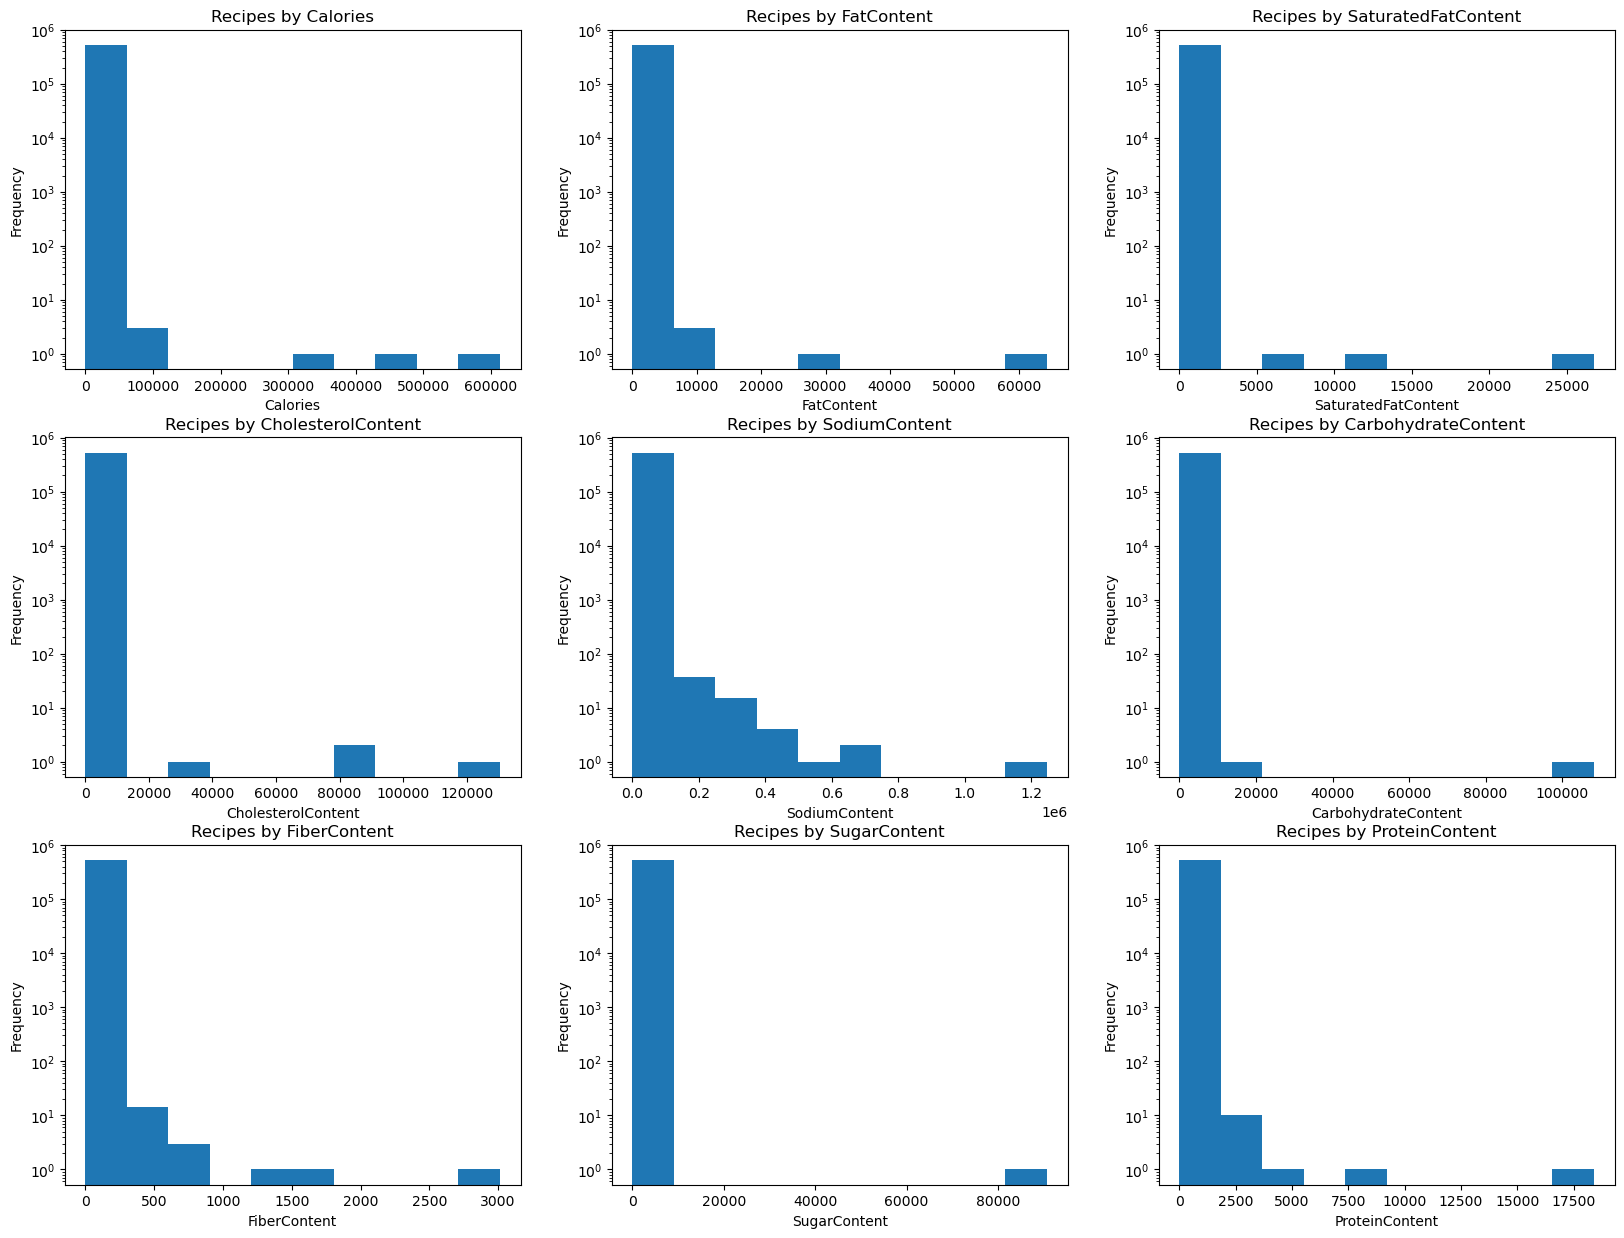

In [19]:
plt.subplots(3,3,figsize= (20,15 )) #subplots 

plt.subplot(3,3,1)
plt.hist(recipes['Calories'].values,log=True) #Calories 
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Recipes by Calories')

plt.subplot(3,3,2)
plt.hist(recipes['FatContent'].values,log=True) #FatContent
plt.xlabel('FatContent')
plt.ylabel('Frequency')
plt.title('Recipes by FatContent')


plt.subplot(3,3,3)
plt.hist(recipes['SaturatedFatContent'].values,log=True) #SaturatedFatContent
plt.xlabel('SaturatedFatContent')
plt.ylabel('Frequency')
plt.title('Recipes by SaturatedFatContent')

plt.subplot(3,3,4)
plt.hist(recipes['CholesterolContent'].values,log=True) #CholesterolContent
plt.xlabel('CholesterolContent')
plt.ylabel('Frequency')
plt.title('Recipes by CholesterolContent')

plt.subplot(3,3,5)
plt.hist(recipes['SodiumContent'].values,log=True) #SodiumContent
plt.xlabel('SodiumContent')
plt.ylabel('Frequency')
plt.title('Recipes by SodiumContent')

plt.subplot(3,3,6)
plt.hist(recipes['CarbohydrateContent'].values,log=True) #CarbohydrateContent
plt.xlabel('CarbohydrateContent')
plt.ylabel('Frequency')
plt.title('Recipes by CarbohydrateContent')

plt.subplot(3,3,7)
plt.hist(recipes['FiberContent'].values,log=True) #FiberContent
plt.xlabel('FiberContent')
plt.ylabel('Frequency')
plt.title('Recipes by FiberContent')

plt.subplot(3,3,8)
plt.hist(recipes['SugarContent'].values,log=True) #SugarContent
plt.xlabel('SugarContent')
plt.ylabel('Frequency')
plt.title('Recipes by SugarContent')

plt.subplot(3,3,9)
plt.hist(recipes['ProteinContent'].values,log=True) #ProteinContent
plt.xlabel('ProteinContent')
plt.ylabel('Frequency')
plt.title('Recipes by ProteinContent')

plt.show()



I will pull the the descriptive stats here to support the analysis

In [20]:
recipes.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,521766.000000,5.217660e+05,269049.000000,274776.000000,521766.000000,521766.000000,521766.000000,521766.000000,5.217660e+05,521766.000000,521766.000000,521766.000000,521766.000000,339122.000000
mean,271699.143612,4.554590e+07,4.632097,5.229958,484.281428,24.604097,9.556642,86.455261,7.657651e+02,49.092520,3.841429,21.881097,17.452118,8.608928
std,155477.903250,2.924022e+08,0.641892,20.390325,1397.791422,111.547324,46.649315,302.104421,4.194175e+03,180.917929,8.605882,142.688072,40.102903,114.401280
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137066.250000,6.947400e+04,4.500000,1.000000,174.100000,5.600000,1.500000,3.800000,1.231250e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271611.500000,2.385845e+05,5.000000,2.000000,317.000000,13.800000,4.700000,42.500000,3.529000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,405993.750000,5.655920e+05,5.000000,4.000000,528.900000,27.400000,10.800000,107.800000,7.914750e+02,51.100000,4.500000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


As we can see, 
- Calories- we have outliers with a max around 612k where as the average is only 484 and 3rd quartlie is 529 as well. This was visble in the graph visualisation as well.
- Following a similar pattern, we can see that we have outliers in all FatContent, SaturdatedFatContent, CholosterolContent, SodiumContent, CarbohydrateContent, FiberContent, SugarContent, ProteinContent, max values rangea away from 3Q and the average vastly. 
- Hence it can be conculuded that dataset is distribited around the similar contents in terms of recipes.

### <a id='toc4_1_3_'></a>[Ingredients](#toc0_)

Ingredients is a column with many characters other than the ingredients itself

##### <a id='toc4_1_3_1_1_'></a>[Most Common & Least Common Ingredients](#toc0_)

In [21]:
recipes['RecipeIngredientParts'][0]

'c("blueberries", "granulated sugar", "vanilla yogurt", "lemon juice")'

In [22]:
#removing the opening and closing paranthesis, double quotes
recipes['RecipeIngredientParts']=  recipes['RecipeIngredientParts'].apply(lambda x: re.sub(r'c\(|\)', '', x).replace('"', ''))


recipes['RecipeIngredientParts'][5]

'graham cracker crumbs, sugar, butter, sugar, cornstarch, salt, milk, vanilla extract, water, gelatin, rum, cream of tartar, sugar'

(-0.5, 1199.5, 799.5, -0.5)

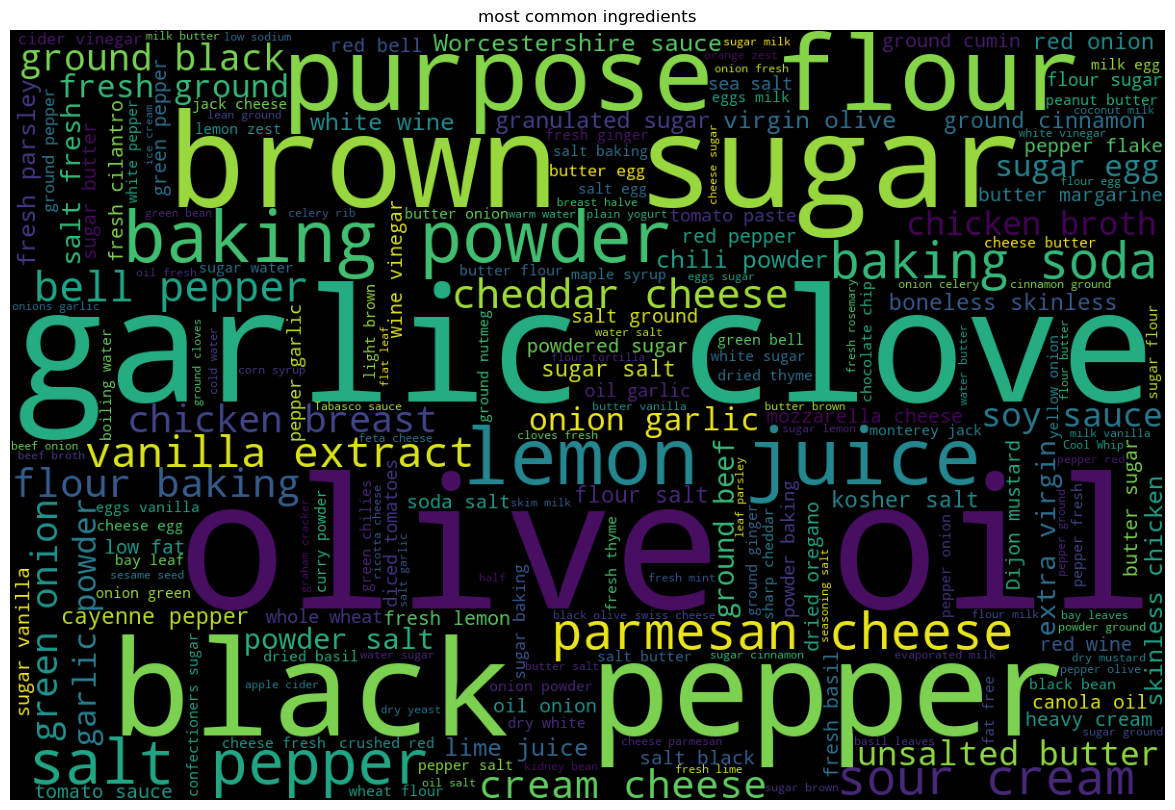

In [23]:
from wordcloud import WordCloud

# concatenate all ingredients into a single string
ingredients_text = ' '.join(recipes['RecipeIngredientParts'].explode().str.replace("'", ""))

# Create a WordCloud object 
plt.figure(figsize=(20,10))
wordcloud = WordCloud(width=1200, height=800).generate(ingredients_text)

plt.imshow(wordcloud)
plt.title('most common ingredients')
plt.axis('off')


In [24]:
from collections import Counter # getting the library

#comverting the ingredients to one combined list
def Convert(string):
    li = list(string.split(" "))
    return li
 
 
ingredients_list= Convert(ingredients_text)

combined_ingredient_list = [] #list to store combined ingredients

for each_ingredient_string in ingredients_list:
    ingredient_list_new= each_ingredient_string.split(',') #splitting by comma
    combined_ingredient_list.extend(ingredient_list_new)

count_of_ingredients=Counter(combined_ingredient_list) # getting the count by the counter function

ingredient_counts_df = pd.DataFrame(list(count_of_ingredients.items()), columns=["Ingredient", "Count"]) #converting to a dataframe

ingredient_counts_df = ingredient_counts_df.sort_values(by="Count", ascending=False) #sorting
ingredient_counts_df.head(30)

,Ingredient,Count
1,,3612873
30,salt,235916
3,sugar,231652
67,pepper,193424
75,butter,174851
102,cheese,161918
26,fresh,158125
15,garlic,149342
82,flour,141060
32,onion,132860


In [25]:
# dropping the space punctuation mark from the dataframe for the EDA purpose as it is skewing the data visualisation. This will be handled seperately in the modeling phase.
ingredient_counts_df=ingredient_counts_df.drop(1)

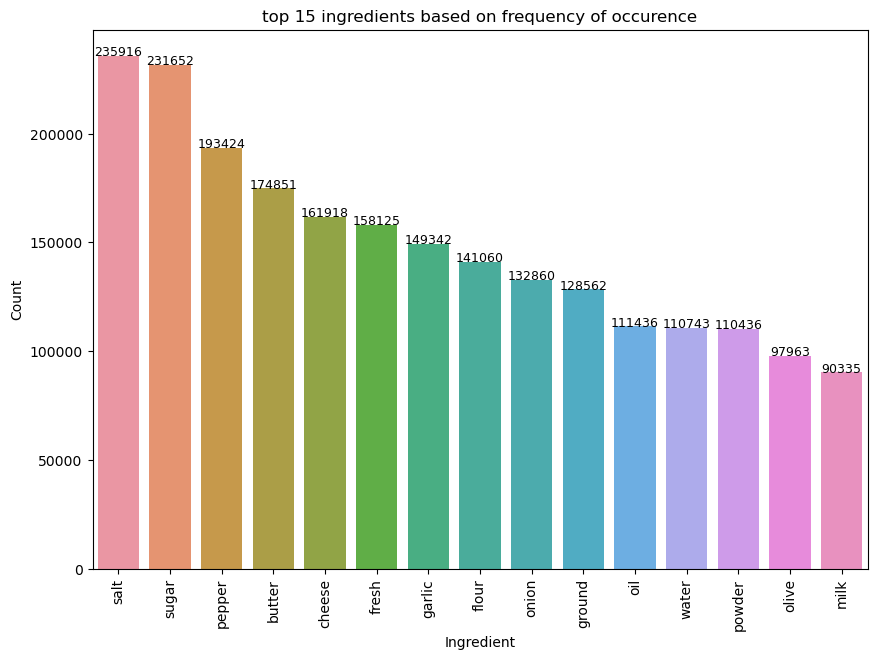

In [26]:
#defining top n and botton n values
top_n= 15
bottom_n= 30

#creating 2 dataframes for visualisation purpose with top n and botton n values

df_top_ingredients= ingredient_counts_df.head(top_n)
df_bottom_ingredients= ingredient_counts_df.tail(bottom_n)

#creating a bar plot with the top ingredients

x= df_top_ingredients['Ingredient']
y= df_top_ingredients['Count']

plt.figure(figsize= (10,7))
ax= sns.barplot(data= df_top_ingredients, x= df_top_ingredients['Ingredient'], y= df_top_ingredients['Count'])
plt.xticks(rotation= 90)
for bar in ax.patches:
    data_values="{:.0f}".format(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2,  #label positions
            bar.get_y() + bar.get_height(),
            s=f'{data_values}',  #displaying the dynamic labels
            ha='center', #position
            color='black', #color
            size=9) #size
plt.title('top 15 ingredients based on frequency of occurence')
plt.show()

Based on the visualisations here, it is clear that common ingredients such as salt, pepper, sugar, onion are very common in recipes where as egg and milk is also there in many reipes. Hence we can understand that most of these recipes could be non-vegan friendly. 

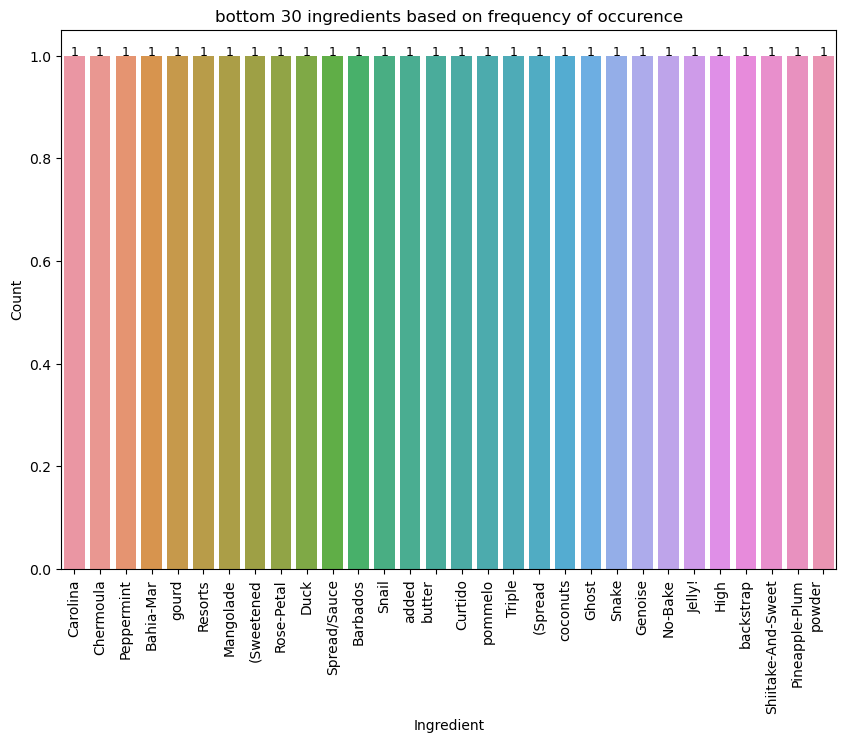

In [27]:
x= df_bottom_ingredients['Ingredient']
y= df_bottom_ingredients['Count']

plt.figure(figsize= (10,7))
ax1= sns.barplot(data= df_bottom_ingredients, x= df_bottom_ingredients['Ingredient'], y= df_bottom_ingredients['Count'])
plt.xticks(rotation= 90)
for bar in ax1.patches:
    data_values= "{:.0f}".format(bar.get_height())
    ax1.text(bar.get_x() + bar.get_width()/2,  #label positions
            bar.get_y() + bar.get_height(),
            s=f'{data_values}',  #displaying the dynamic labels
            ha='center', #position
            color='black', #color
            size=9) #size
plt.title('bottom 30 ingredients based on frequency of occurence')
plt.show()

This analysis shows that the least commonly used ingredients are very specific ingredients sich as pepermint, duck, pineapple poweder etc. It can also be seen that words such as verbs appear here. And word coconuts has appeared as only used once, at this point it could be that coconut singular form is there more than the word coconuts alone. Tokenizing them using NLP techniques could address this issue later. 

##### <a id='toc4_1_3_1_2_'></a>[Length of ingredients](#toc0_)

I will also now analyse the lengths of ingredients to get an idea of the recipe length.

In [28]:
#getting the length of each cleaned ingredient list

length_of_ingredients= []
for each_ingredient in recipes['RecipeIngredientParts']:
    length_of_ingredients.append(len(each_ingredient.split(' ')))


In [29]:
#equating the 2 lists 'length_of_ingredients' & 'ingredients cleaned ' to 2 columns
recipes['length of ingredients']= length_of_ingredients

In [30]:
#creating 2 dataframes with the top n and bottom n length of ingredients
df_length_top= recipes.sort_values(by= 'length of ingredients', ascending=False)
df_length_bottom= recipes.sort_values(by= 'length of ingredients', ascending=True)
df_length_top=df_length_top.head(20)
df_length_bottom= df_length_bottom.head(20)

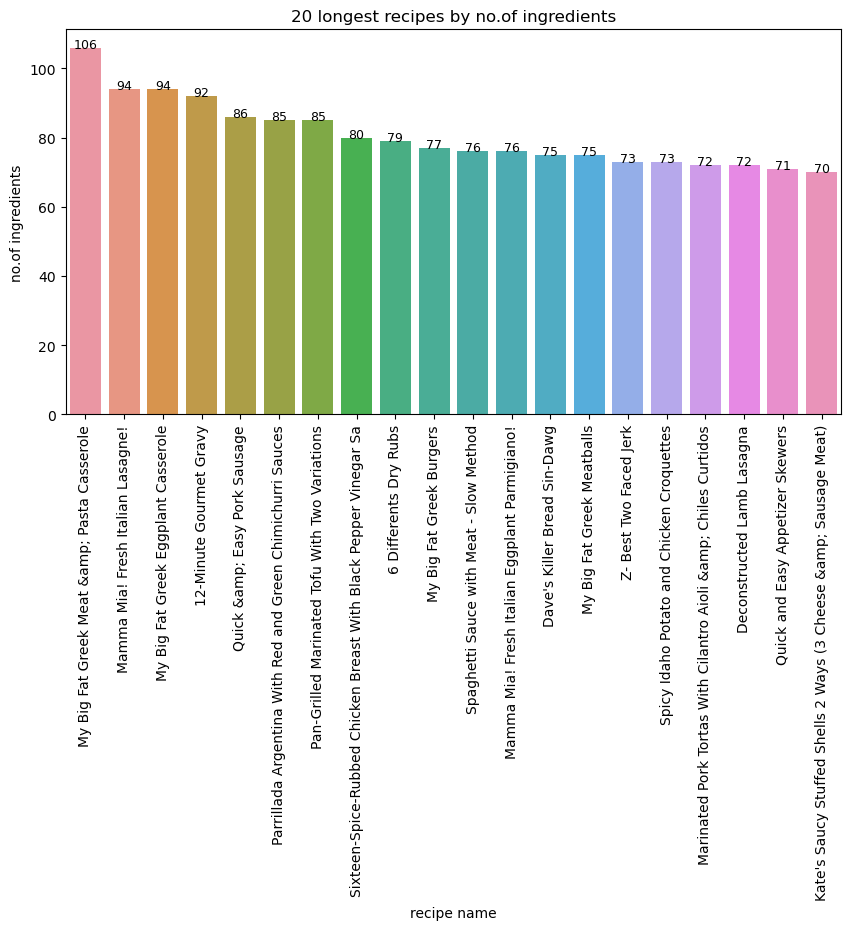

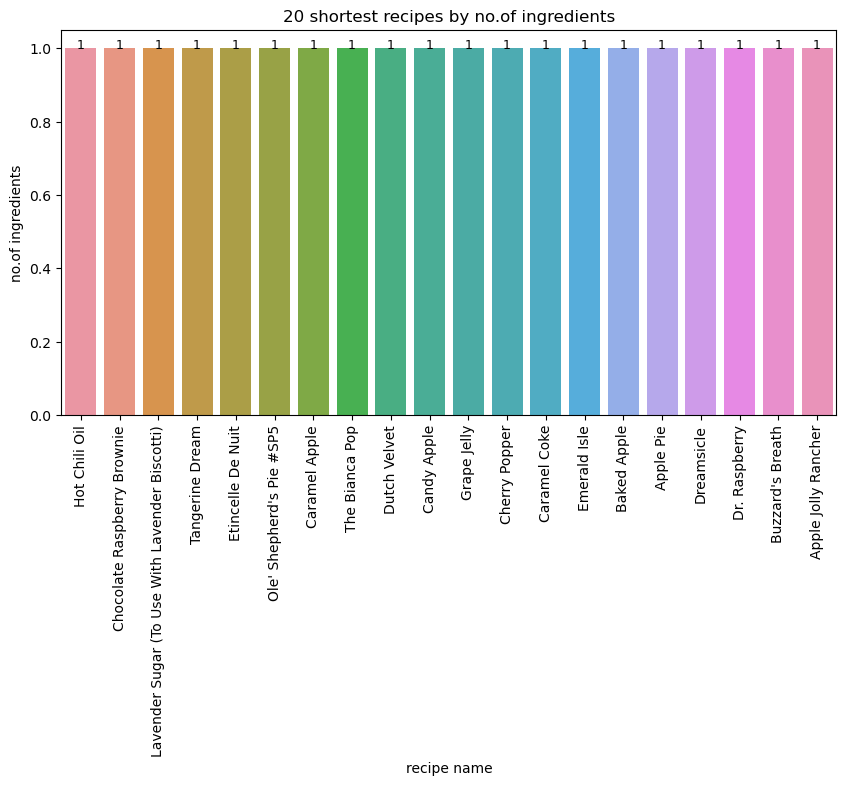

In [31]:
#plotting the graphs with longest and shortest lists of ingredients

#graph 1- longest
x= df_length_top['Name'] #defining x
y= df_length_top['length of ingredients'] #defining y

plt.figure(figsize= (10,5))
ax1= sns.barplot(data= df_length_top, x= df_length_top['Name'], y= df_length_top['length of ingredients']) #plot
plt.xticks(rotation=90) # xticks
for bar in ax1.patches: #data values
    data_values="{:.0f}".format(bar.get_height())
    ax1.text(bar.get_x() + bar.get_width()/2,
             bar.get_y() + bar.get_height(),
             s= f'{data_values}',
             ha= 'center',
             size= 9)

plt.title('20 longest recipes by no.of ingredients') #title
plt.xlabel('recipe name') #xlabel
plt.ylabel('no.of ingredients') #ylabel
plt.show()

#graph 2- shortest

plt.figure(figsize= (10,5))

x= df_length_bottom['Name']
y= df_length_bottom['length of ingredients']

ax2= sns.barplot(data= df_length_bottom, x= df_length_bottom['Name'], y= df_length_bottom['length of ingredients'])
plt.xticks(rotation=90)
for bar in ax2.patches:
    data_values= "{:.0f}".format(bar.get_height())
    ax2.text(bar.get_x() + bar.get_width()/2,
             bar.get_y() + bar.get_height(),
             s= f'{data_values}',
             ha= 'center',
             size= 9)

plt.title('20 shortest recipes by no.of ingredients')
plt.xlabel('recipe name')
plt.ylabel('no.of ingredients')
plt.show()

Text(0.5, 1.0, 'distribution of length of ingredients')

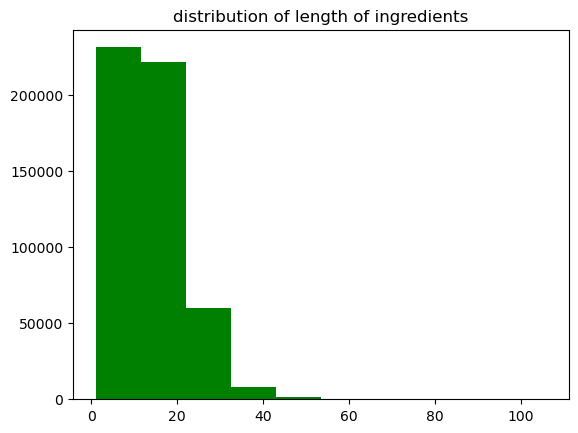

In [61]:
#checking the distribution of the ingredient lengths
plt.hist(recipes['length of ingredients'], color='green')
plt.title('distribution of length of ingredients')

In [33]:
recipes['length of ingredients'].describe()

count    521766.000000
mean         13.520341
std           7.333865
min           1.000000
25%           8.000000
50%          12.000000
75%          18.000000
max         106.000000
Name: length of ingredients, dtype: float64

Above further shows that the mean no.of ingredients is ~13and 50% marks at 12 as well. This implies that data lies towards that quadrant as opposed the the max recorded at 106. Most of the recipes fall in the range 5-20 and hence this shows that the databse recipes are generally require limited ingredients. Because of this our similarity could either be very high or even low as many dont need alot of ingredients.

### <a id='toc4_1_4_'></a>[Title column](#toc0_)

##### <a id='toc4_1_4_1_1_'></a>[Most common and least common title words](#toc0_)

(-0.5, 1199.5, 799.5, -0.5)

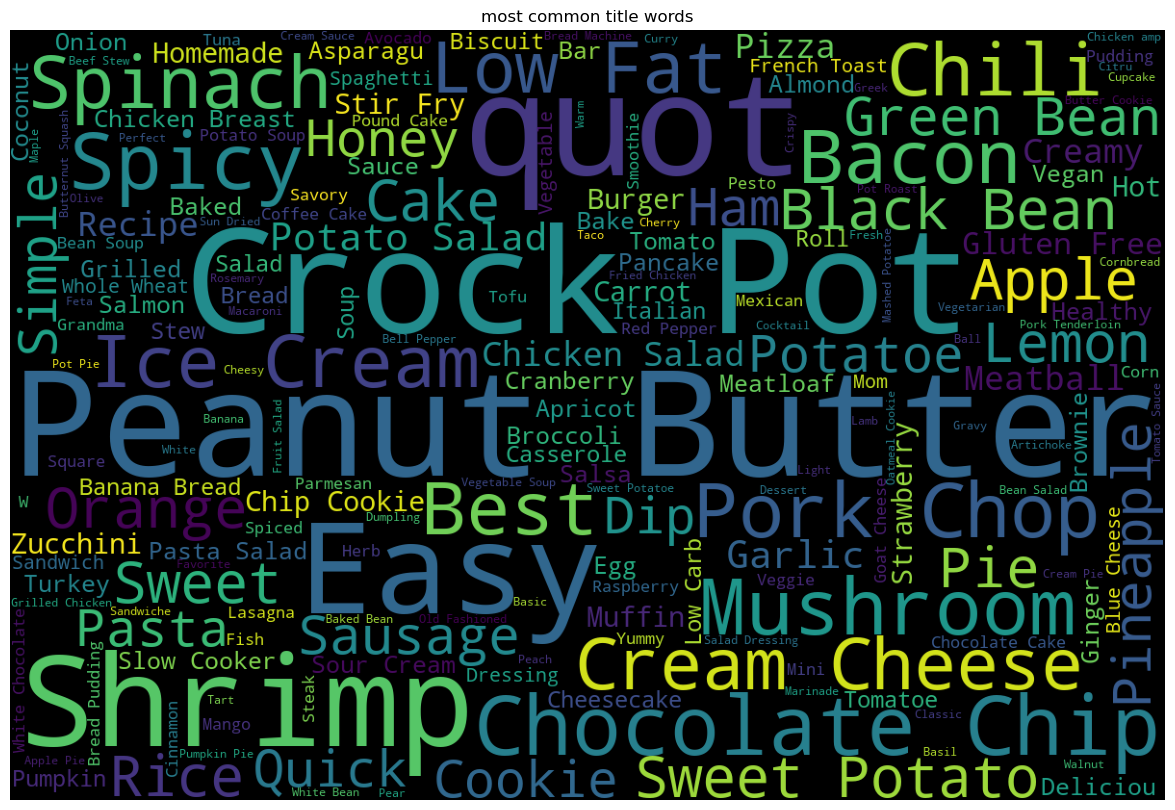

In [34]:
# concatenate all title words into a single string
title_text = ' '.join(recipes['Name'].explode().str.replace("'", ""))

# create a WordCloud object
plt.figure(figsize=(20,10))
wordcloud = WordCloud(width=1200, height=800).generate(title_text)

plt.imshow(wordcloud)
plt.title('most common title words')
plt.axis('off')

In [35]:
#converting the titles to one combined word list
def Convert(string):
    li = list(string.split(" "))
    return li
 

title_list= Convert(title_text)


#dataframe
combined_title_list = [] #list to store combined ingredients

for each_title in title_list:
    title_list_new= each_title.split(',') #splitting by comma
    combined_title_list.extend(title_list_new)

count_of_titles=Counter(combined_title_list) # getting the count by the counter function

title_word_counts_df = pd.DataFrame(list(count_of_titles.items()), columns=["Title_Word", "Count"]) #converting to a dataframe

title_word_counts_df = title_word_counts_df.sort_values(by="Count", ascending=False) #sorting
title_word_counts_df.head(30)

,Title_Word,Count
68,and,61164
21,With,49563
16,Chicken,48080
70,Salad,29322
66,,26634
76,Sauce,20755
12,Soup,20566
266,Chocolate,19859
46,Cake,19024
201,Cheese,18857


In [36]:
title_word_counts_df.tail(30)

,Title_Word,Count
48757,Rice-Suthun,1
16753,Edisto,1
48731,“smooth-See”,1
48729,Fabuloso,1
48704,Chocteer,1
48728,&quot;irregularity&quot;,1
48705,Azure,1
16786,Honeybutter,1
48707,Candlelight,1
48708,Progress),1


In [37]:
#again dropping the rows with and & space to remove the skewness 
title_word_counts_df= title_word_counts_df.drop(68)
title_word_counts_df=title_word_counts_df.drop(66)
title_word_counts_df=title_word_counts_df.drop(26)

This shows that some of the most common recipe types are;
- Soup
- Salad
- Chocolate
- Chicken
- Cookies



This gives a good idea when we develop the solution to expect these type of results more, however a deep clustering could analyse this further.

##### <a id='toc4_1_4_1_2_'></a>[Length of titles](#toc0_)

I will now also check the length of recipe titiles to see if there are any patterns. For that I will get the length of the words in the titles.

Text(0.5, 1.0, 'distribution of length of titles')

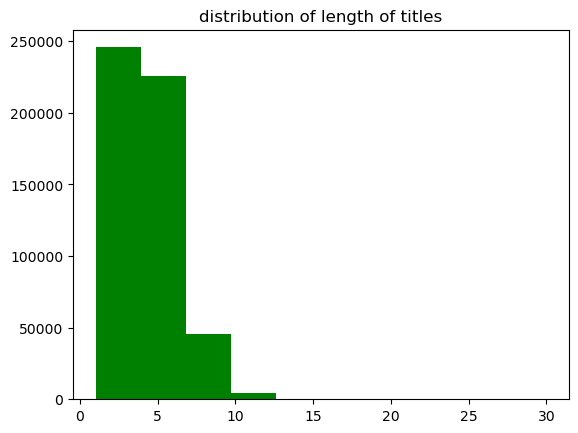

In [66]:
#title length
length_of_titles= []
for each_title in recipes['Name']:
    length_of_titles.append(len(each_title.split(' ')))

#adding the columns to the dataset
recipes['length_of_titles']=length_of_titles

#plotting the histogram
plt.hist(recipes['length_of_titles'], color='green')
plt.title('distribution of length of titles')

In [39]:
#descriptive stats for the column
recipes['length_of_titles'].describe()

count    521766.000000
mean          4.015093
std           1.770176
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          30.000000
Name: length_of_titles, dtype: float64

This is a distribution where we can see the title lengths vary from ~1-30 and most of them are centraised in the 1-5 range. Now I will check another step to see if there is any correlation between the lnegth of ingredients and titles.

<Axes: >

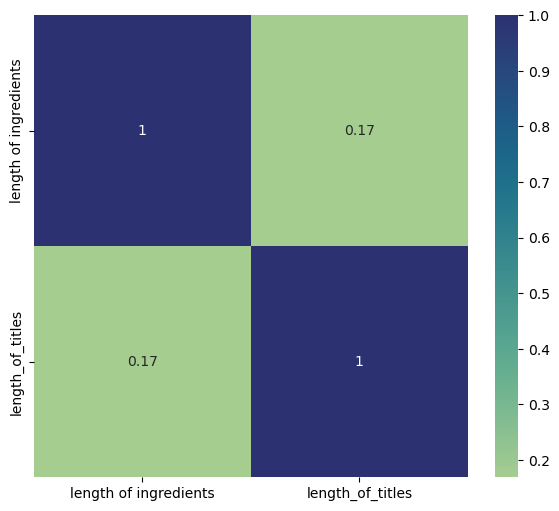

In [67]:
#heatmap graph
plt.figure(figsize=(7,6))

length_columns= recipes[['length of ingredients', 'length_of_titles']]
corr_matrix= length_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest')

This now gives an overall view of the lengths of the two columns, ingredients and title.

### <a id='toc4_1_5_'></a>[Review rating](#toc0_)

In [41]:
recipes['AggregatedRating']

0         4.5
1         3.0
2         4.5
3         4.5
4         4.5
         ... 
522512    NaN
522513    NaN
522514    NaN
522515    NaN
522516    NaN
Name: AggregatedRating, Length: 521766, dtype: float64

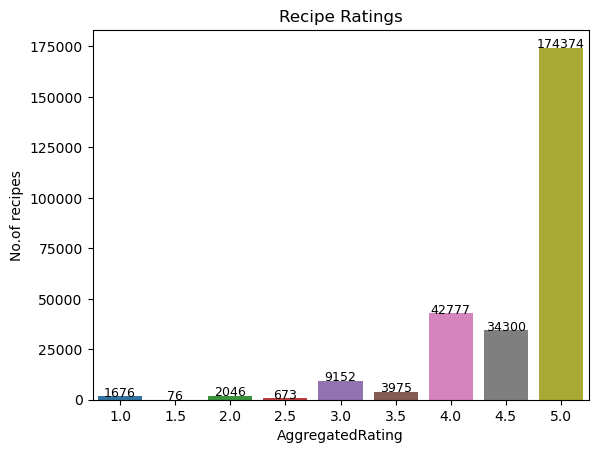

In [70]:
#creating a dataframe with the count of recipes, amd sorting to get the top 25
rating_df= recipes.groupby('AggregatedRating').count()['RecipeId'].reset_index()


#graph visualisation

plt.figure()
ax= sns.barplot(data=rating_df, x='AggregatedRating', y= 'RecipeId') #barplot axis
plt.xticks()

for bar in ax.patches: #labels 
    data_values= "{:.0f}".format(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2,  #label positions
            bar.get_y() + bar.get_height(),
            s=f'{data_values}',  #displaying the dynamic labels
            ha='center', #position
            color='black', #color
            size=9) #size
plt.ylabel('No.of recipes') #ylabel
plt.title('Recipe Ratings') #title 

plt.show()

It is clearly noted that most of the recipes in the dataset have a high rating score. However it should also be noted that ~48% of the recipes dont have an Aggregated Rating data and carries null values. Hence the picture could be totally different if the dataset was complete.

In [43]:
recipes.isna().sum()/recipes.shape[0]*100

RecipeId                       0.000000
Name                           0.000000
AuthorId                       0.000000
AuthorName                     0.000000
CookTime                      15.815136
PrepTime                       0.000000
TotalTime                      0.000000
DatePublished                  0.000000
Description                    0.000958
Images                         0.000192
RecipeCategory                 0.000000
Keywords                       3.159654
RecipeIngredientQuantities     0.000575
RecipeIngredientParts          0.000000
AggregatedRating              48.434931
ReviewCount                   47.337312
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000


# <a id='toc5_'></a>[Preprocessing](#toc0_)

I will next pre-process the text columns to be used in the modeling. Here I will be removing the characters paranthesis and commas so that words can be identified.

### <a id='toc5_1_1_'></a>[Ingredients](#toc0_)

In [44]:
#removing the opening and closing paranthesis, double quotes

recipes['RecipeIngredientParts']= recipes['RecipeIngredientParts'].str.replace(r'^c\("|"\)$','')
recipes['RecipeIngredientParts']= recipes['RecipeIngredientParts'].str.replace('"', '')


recipes['RecipeIngredientParts']

C:\Users\e312995\AppData\Local\Temp\ipykernel_24664\909941027.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  recipes['RecipeIngredientParts']= recipes['RecipeIngredientParts'].str.replace(r'^c\("|"\)$','')


0         blueberries, granulated sugar, vanilla yogurt,...
1         saffron, milk, hot green chili peppers, onions...
2         sugar, lemons, rind of, lemon, zest of, fresh ...
3         extra firm tofu, eggplant, zucchini, mushrooms...
4         plain tomato juice, cabbage, onion, carrots, c...
                                ...                        
522512    fresh ginger, unsalted butter, dark brown suga...
522513    Dijon mustard, garlic, peppercorns, shallot, c...
522514            half-and-half, heavy cream, brandy, sugar
522515    wasabi paste, dill, English cucumber, smoked s...
522516    hard-boiled eggs, breakfast sausage, panko bre...
Name: RecipeIngredientParts, Length: 521766, dtype: object

### <a id='toc5_1_2_'></a>[Keywords](#toc0_)

Next I will deep dive the Keywords to analyse the vegan recipes. Also I will do some data pre processing to faciliatte modeling later on. ()

In [45]:
#variable to store keywords
keywords= recipes['Keywords']
keywords= keywords.astype(str)

In [46]:
#removing the opening and closing paranthesis, double quotes

key_pattern_open= re.compile(r'c\(')
key_pattern_close= re.compile(r'\)')
key_pattern_comma= re.compile(r'"')

for i in range(len(keywords)):
    keywords.iloc[i]= key_pattern_open.sub('',keywords.iloc[i])
    keywords.iloc[i]= key_pattern_close.sub('',keywords.iloc[i])
    keywords.iloc[i]= key_pattern_comma.sub('',keywords.iloc[i])



keywords[5]

'Dessert, Weeknight, Stove Top, < 4 Hours'

In [47]:
recipes['Keywords']= keywords

I will check the contents of the keywords column to see if  the word vegan is present. I will also check the recipe category column to compare the findings of both.

In [48]:

recipes['Vegan/Not']= np.where(recipes['Keywords'].str.contains('Vegan'), "Vegan", "Non-Vegan")

In [49]:
recipes.groupby('Vegan/Not')['RecipeId'].count()

Vegan/Not
Non-Vegan    502709
Vegan         19057
Name: RecipeId, dtype: int64

In [50]:
recipes['Vegan/Not_Cat']= np.where(recipes['RecipeCategory'].str.contains('Vegan'), "Vegan", "Non-Vegan")
recipes.groupby('Vegan/Not_Cat')['RecipeId'].count()

Vegan/Not_Cat
Non-Vegan    520924
Vegan           842
Name: RecipeId, dtype: int64

It can be seen that recipe categoory is not a good indicator whether the recipe is vegan as it shows only 842 recipes where as the the keywords column identified more than 19000 recipes. I will do a sanity check of the data to confirm if the recipes are indeed vegan.

In [51]:
#dropping the vegan indicator from the category column
recipes.drop(['Vegan/Not_Cat'], axis=1, inplace=True)

In [52]:
#sanity check
recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,length of ingredients,length_of_titles,Vegan/Not
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan...",7,5,Non-Vegan
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and...",38,1,Non-Vegan
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ...",12,2,Non-Vegan
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc...",28,3,Non-Vegan
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil...",7,2,Vegan


In [53]:
#exporting a sample of the vegan recipes to check the ingredients 
file_path_vegan= 'C:/Users/e312995/OneDrive - WESCO DISTRIBUTION/Documents/PERSONAL/BRAINSTATION/CAPSTONE/Datasets/recipes_vegan_check.csv'
recipes[recipes['Vegan/Not']=='Vegan']['RecipeIngredientParts'].sample(20).to_csv(file_path_vegan)

Perfect !! Recipes are indeed vegan.

Now I will expore the vegan recipes to another csv to use as the dataset for vegan specific recommendations.

### <a id='toc5_1_3_'></a>[RecipeInstructions](#toc0_)

In [54]:
print(recipes['RecipeInstructions'][0])

c("Toss 2 cups berries with sugar.", "Let stand for 45 minutes, stirring occasionally.", "Transfer berry-sugar mixture to food processor.", "Add yogurt and process until smooth.", "Strain through fine sieve. Pour into baking pan (or transfer to ice cream maker and process according to manufacturers' directions). Freeze uncovered until edges are solid but centre is soft.  Transfer to processor and blend until smooth again.", "Return to pan and freeze until edges are solid.", "Transfer to processor and blend until smooth again.", 
"Fold in remaining 2 cups of blueberries.", "Pour into plastic mold and freeze overnight. Let soften slightly to serve.")


In [55]:
#cleaning
recipes['RecipeInstructions']=  recipes['RecipeInstructions'].apply(lambda x: re.sub(r'c\(|\)', '', x).replace('"', ''))


recipes['RecipeInstructions'][0]

"Toss 2 cups berries with sugar., Let stand for 45 minutes, stirring occasionally., Transfer berry-sugar mixture to food processor., Add yogurt and process until smooth., Strain through fine sieve. Pour into baking pan (or transfer to ice cream maker and process according to manufacturers' directions. Freeze uncovered until edges are solid but centre is soft.  Transfer to processor and blend until smooth again., Return to pan and freeze until edges are solid., Transfer to processor and blend until smooth again., \nFold in remaining 2 cups of blueberries., Pour into plastic mold and freeze overnight. Let soften slightly to serve."

Exporting the original-cleaned dataset for modeling

In [56]:
file_path= 'C:/Users/e312995/OneDrive - WESCO DISTRIBUTION/Documents/PERSONAL/BRAINSTATION/CAPSTONE/Datasets/recipes_cleaned.csv'
recipes.to_csv(file_path)